In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torch.optim as optim
import tqdm.notebook as tqdm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.optim.lr_scheduler import StepLR
from torchvision.transforms import ToPILImage
from IPython.display import Image

import copy
import os
import sys
sys.path.append('/Users/Matt/projects/gmmvae/')

import gmmvae

## Data preparation.

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST('../data', train=True, download=True,
                               transform=transform)
test_dataset = datasets.MNIST('../data', train=False,
                              transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

## Classifier training.

In [3]:
def train_cls(model, train_loader, optimiser, epoch):
    model.train()
    batch_iter = tqdm.tqdm(enumerate(train_loader), desc='Batch')
    for batch_idx, (x, y) in batch_iter:
        optimiser.zero_grad()
        loss, _ = model.nll(x, y)
        loss.backward()
        optimiser.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test_cls(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            loss, output = model.nll(x, y)
            test_loss += loss.item()
            
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(y.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [4]:
cls = gmmvae.classifiers.MNISTClassificationNet()
cls_optimiser = optim.Adadelta(cls.parameters(), lr=1.0)
cls_scheduler = StepLR(cls_optimiser, step_size=1, gamma=0.7)

In [5]:
for epoch in range(1, 14+1):
    train_cls(cls, train_loader, cls_optimiser, epoch)
    test_cls(cls, test_loader)
    cls_scheduler.step()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.336521
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.762362
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.902133
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.786577
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.766826
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.520508
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.341206
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.550706
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.375339
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.412179
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.229879
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.149578
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.338714
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.302172
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.266044
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.301149
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.169085
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.269397
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.252988
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.257496
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.149625
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.209688
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.012956
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.049796
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.034954
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.174159
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.118772
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.046254
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.137985
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.089197
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.240095
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.060669
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.025990
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.084622
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.244162
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.036560
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.117336
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.071076
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.066820
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.060206
Train Epoch: 2 [12800/60000 (

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.093358
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.046807
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.018841
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.009124
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.032770
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.033162
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.016863
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.006753
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.037472
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.037932
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.076767
Train Epoch: 3 [7040/60000 (12%)]	Loss: 0.053590
Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.007382
Train Epoch: 3 [8320/60000 (14%)]	Loss: 0.008914
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.006023
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.023799
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.063576
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.032225
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.068064
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.123014
Train Epoch: 3 [12800/60000 (

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.010729
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.053077
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.076342
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.019882
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.054078
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.051090
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.103408
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.038410
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.109171
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.014468
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.023034
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.065346
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.001414
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.011653
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.022708
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.029163
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.096349
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.089826
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.070929
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.048288
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.028088
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.061966
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.059633
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.007146
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.020993
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.018790
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.002910
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.002999
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.109484
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.024498
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.300706
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.013723
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.009225
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.024306
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.063321
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.032492
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.004715
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.006112
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.032655
Train Epoch: 5 [12160/60000 (20%)]	Loss: 0.054498
Train Epoch: 5 [12800/60000 (

KeyboardInterrupt: 

## Set GMMVAE datasets. 

In [6]:
pred_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False)
cls_output = torch.zeros(len(train_dataset), 10)
with torch.no_grad():
    for batch_idx, (x, y) in enumerate(pred_loader):
        cls_output[batch_idx*64:(batch_idx+1)*64] = cls(x).detach().exp()

In [7]:
class GMMVAEDataset(torch.utils.data.Dataset):
    def __init__(self, x, y, cls_output):
        self.x = x
        self.y = y
        self.cls_output = cls_output
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        return self.x[idx, ...], self.cls_output[idx]
    
gmmvae_dataset = GMMVAEDataset(train_dataset.data, train_dataset.targets, cls_output)
gmmvae_loader = torch.utils.data.DataLoader(gmmvae_dataset, batch_size=64)

In [20]:
def train_gmmvae(model, loader, optimiser, epoch):
    model.train()
    train_loss = 0
    batch_iter = tqdm.tqdm(enumerate(loader), desc='Batch')
    
    for batch_idx, (x, pi) in batch_iter:
        optimiser.zero_grad() 
        if isinstance(model, gmmvae.models.GMMVAEFixedCls):
            x = x.unsqueeze(1).float() / 255
            loss = -model.elbo(x, pi, num_samples=1)
        elif type(model) in [gmmvae.models.WeightedVAE, gmmvae.models.HierarchicalVAE, 
                             gmmvae.models.BayesTrex, gmmvae.models.ClsVAE, gmmvae.models.GMMVAE]:
            x = x.view(-1, 784).float() / 255
            loss = -model.elbo(x, pi, num_samples=1)
        elif type(model) in [gmmvae.models.EntroVAE]:
            x = x.view(-1, 784).float() / 255
            h = (- pi * (pi.log() / np.log(2))).sum(1)
            loss = -model.elbo(x, h, num_samples=1)
        else:
            x = x.view(-1, 784).float() / 255
            loss = -model.elbo(x, num_samples=1)
        
        loss.backward()
        
        optimiser.step()
        
        train_loss += loss.item()        
        batch_iter.set_postfix(loss=loss.item())
            
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(loader.dataset)))

In [10]:
z_dim = 2
x_dim = 784

encoder = gmmvae.networks.LinearGaussian(x_dim, z_dim, [512, 256], min_sigma=1e-3)
decoder_z = gmmvae.networks.LinearGaussian(10, z_dim, [10, 10], min_sigma=1e-3)
cls_encoder = gmmvae.networks.LinearGaussianIndexed(x_dim, z_dim, 10, [512, 256], min_sigma=1e-3)
loglikelihood = gmmvae.loglikelihoods.NNBernoulli(z_dim, x_dim, [256, 512])
loglikelihood_y = gmmvae.loglikelihoods.NNDiscrete(z_dim, 10, [10, 10])
encoder_y = gmmvae.networks.LinearGaussian(10, z_dim, [10, 10], min_sigma=1e-3)

gmmvae_cls = copy.deepcopy(cls)
for param in gmmvae_cls.parameters():
    param.requires_grad = False

# Define various VAE models.
vae = gmmvae.models.VAE(
    copy.deepcopy(loglikelihood), copy.deepcopy(encoder), z_dim)

entrovae = gmmvae.models.EntroVAE(
    copy.deepcopy(loglikelihood), copy.deepcopy(encoder), z_dim)

weighted_vae = gmmvae.models.WeightedVAE(
    copy.deepcopy(loglikelihood), copy.deepcopy(encoder), z_dim, 10)

gmmvae_model = gmmvae.models.GMMVAE(
    copy.deepcopy(loglikelihood), copy.deepcopy(encoder), z_dim, 10)

gmmvaecls_model = gmmvae.models.GMMVAEFixedCls(
    copy.deepcopy(loglikelihood), gmmvae_cls, cls_encoder,  z_dim, 10)

hierarchical_vae = gmmvae.models.HierarchicalVAE(
    copy.deepcopy(loglikelihood), copy.deepcopy(encoder), copy.deepcopy(decoder_z), z_dim)

clsvae = gmmvae.models.ClsVAE(
    copy.deepcopy(loglikelihood), copy.deepcopy(loglikelihood_y), copy.deepcopy(encoder), 
    copy.deepcopy(encoder_y), z_dim)

## GMMVAE training.

In [11]:
vae_optimiser = optim.Adam(vae.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(vae, gmmvae_loader, vae_optimiser, epoch)


====> Epoch: 1 Average loss: 2.8108



====> Epoch: 2 Average loss: 2.4945



====> Epoch: 3 Average loss: 2.4119



====> Epoch: 4 Average loss: 2.3639



====> Epoch: 5 Average loss: 2.3288



====> Epoch: 6 Average loss: 2.3035



====> Epoch: 7 Average loss: 2.2865



====> Epoch: 8 Average loss: 2.2725



====> Epoch: 9 Average loss: 2.2596



====> Epoch: 10 Average loss: 2.2477



====> Epoch: 11 Average loss: 2.2421



====> Epoch: 12 Average loss: 2.2376



====> Epoch: 13 Average loss: 2.2300



====> Epoch: 14 Average loss: 2.2184


In [16]:
entrovae_optimiser = optim.Adam(entrovae.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(entrovae, gmmvae_loader, entrovae_optimiser, epoch)


====> Epoch: 1 Average loss: 2.9703



====> Epoch: 2 Average loss: 2.7022



====> Epoch: 3 Average loss: 2.6318



====> Epoch: 4 Average loss: 2.5894



====> Epoch: 5 Average loss: 2.5571



====> Epoch: 6 Average loss: 2.5300



====> Epoch: 7 Average loss: 2.5116



====> Epoch: 8 Average loss: 2.4962



====> Epoch: 9 Average loss: 2.4820



====> Epoch: 10 Average loss: 2.4747



====> Epoch: 11 Average loss: 2.4569



====> Epoch: 12 Average loss: 2.4494



====> Epoch: 13 Average loss: 2.4372



====> Epoch: 14 Average loss: 2.4333


In [17]:
weighted_vae_optimiser = optim.Adam(weighted_vae.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(weighted_vae, gmmvae_loader, weighted_vae_optimiser, epoch)


====> Epoch: 1 Average loss: 2.7904



====> Epoch: 2 Average loss: 2.4855



====> Epoch: 3 Average loss: 2.3911



====> Epoch: 4 Average loss: 2.3410



====> Epoch: 5 Average loss: 2.3042



====> Epoch: 6 Average loss: 2.2790



====> Epoch: 7 Average loss: 2.2575



====> Epoch: 8 Average loss: 2.2407



====> Epoch: 9 Average loss: 2.2257



====> Epoch: 10 Average loss: 2.2120



====> Epoch: 11 Average loss: 2.2021



====> Epoch: 12 Average loss: 2.1956



====> Epoch: 13 Average loss: 2.1851



====> Epoch: 14 Average loss: 2.1787


In [21]:
gmmvae_optimiser = optim.Adam(gmmvae_model.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(gmmvae_model, gmmvae_loader, gmmvae_optimiser, epoch)


====> Epoch: 1 Average loss: 2.8147



====> Epoch: 2 Average loss: 2.4929



====> Epoch: 3 Average loss: 2.4057



====> Epoch: 4 Average loss: 2.3524



====> Epoch: 5 Average loss: 2.3168



====> Epoch: 6 Average loss: 2.2890


KeyboardInterrupt: 

In [ ]:
gmmvaecls_optimiser = optim.Adam(gmmvaecls.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(gmmvaecls, gmmvae_loader, gmmvaecls_optimiser, epoch)

In [144]:
hierarchical_vae_optimiser = optim.Adam(hierarchical_vae.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(hierarchical_vae, gmmvae_loader, hierarchical_vae_optimiser, epoch)


====> Epoch: 1 Average loss: 2.7901



====> Epoch: 2 Average loss: 2.4588



====> Epoch: 3 Average loss: 2.3808



====> Epoch: 4 Average loss: 2.3394



====> Epoch: 5 Average loss: 2.3103



====> Epoch: 6 Average loss: 2.2830



====> Epoch: 7 Average loss: 2.2633



====> Epoch: 8 Average loss: 2.2454



====> Epoch: 9 Average loss: 2.2316



====> Epoch: 10 Average loss: 2.2168



====> Epoch: 11 Average loss: 2.2051



====> Epoch: 12 Average loss: 2.1956



====> Epoch: 13 Average loss: 2.1891



====> Epoch: 14 Average loss: 2.1800


In [178]:
clsvae_optimiser = optim.Adam(clsvae.parameters())
for epoch in range(1, 14+1):
    train_gmmvae(clsvae, gmmvae_loader, clsvae_optimiser, epoch)


====> Epoch: 1 Average loss: 3.0150



====> Epoch: 2 Average loss: 2.5596



====> Epoch: 3 Average loss: 2.4336



====> Epoch: 4 Average loss: 2.3715



====> Epoch: 5 Average loss: 2.3346



====> Epoch: 6 Average loss: 2.3094



====> Epoch: 7 Average loss: 2.2872



====> Epoch: 8 Average loss: 2.2717



====> Epoch: 9 Average loss: 2.2593



====> Epoch: 10 Average loss: 2.2512



====> Epoch: 11 Average loss: 2.2378



====> Epoch: 12 Average loss: 2.2285



====> Epoch: 13 Average loss: 2.2229



====> Epoch: 14 Average loss: 2.2146


## Sample model.

In [20]:
if not os.path.exists('./samples'):
    os.makedirs('./samples')

with torch.no_grad():            
    sample = gmmvae_model.sample(num_samples=100)
    
    filename = './samples/gmmvae_sample'
    
    if os.path.exists(filename + '.png'):
        i = 1
        while os.path.exists(filename + '_' + str(i) + '.png'):
            i += 1
            
        filename = filename + '_' + str(i) + '.png'
        
    else:
        filename = filename + '.png'
    
    save_image(sample.view(100, 1, 28, 28), filename)

## Visualise clustering of latent space.

In [25]:
from matplotlib.patches import Ellipse, Rectangle

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes.
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmmvae(gmmvae, x, y, pi, ax=None):
    ax = ax or plt.gca()
    z = gmmvae.encoder(x)[0].detach()
    h = - (pi * (pi.log()) / np.log(2)).sum(1)
    
    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    c = [colours[y_] for y_ in y]
#     s = 50 * h / h.max()
    s = 20
    ax.scatter(z[:, 0], z[:, 1], c=c, alpha=.75, marker='x', s=s)
    ax.axis('equal')
    
#     for mu, logsigma, colour in zip(gmmvae.pz_y_mu, gmmvae.pz_y_logsigma, colours):
#         mu = mu.detach().numpy()
#         cov = logsigma.exp().diag_embed().detach().numpy()
#         draw_ellipse(mu, cov, alpha=.1, color=colour)
        

def plot_vae(model, x, y, pi, ax=None):
    ax = ax or plt.gca()
    z = model.encoder(x)[0].detach()
    h = - (pi * (pi.log()) / np.log(2)).sum(1)
    
    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    c = [colours[y_] for y_ in y]
    s = 20
    ax.scatter(z[:, 0], z[:, 1], c=c, alpha=.75, marker='x', s=s)
    ax.axis('equal')
    
def plot_clsvae(model, x, y, pi, ax=None):
    ax = ax or plt.gca()
    qz = model.qz(x, pi)
    z = qz.mean.detach()
    
    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    c = [colours[y_] for y_ in y]
    s = 20
    ax.scatter(z[:, 0], z[:, 1], c=c, alpha=.75, marker='x', s=s)
    ax.axis('equal')


def plot_gmmvaecls(model, x, y, pi, ax=None):
    ax = ax or plt.gca()
    z = model.encoder(x, y)[0].detach()
    h = - (pi * (pi.log()) / np.log(2)).sum(1)
    
    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    c = [colours[y_] for y_ in y]
#     s = 50 * h / h.max()
    s = 20
    ax.scatter(z[:, 0], z[:, 1], c=c, alpha=.75, marker='x', s=s)
    ax.axis('equal')
    
#     for mu, logsigma, colour in zip(model.pz_y_mu, model.pz_y_logsigma, colours):
#         mu = mu.detach().numpy()
#         cov = logsigma.exp().diag_embed().detach().numpy()
#         draw_ellipse(mu, cov, alpha=.1, color=colour)

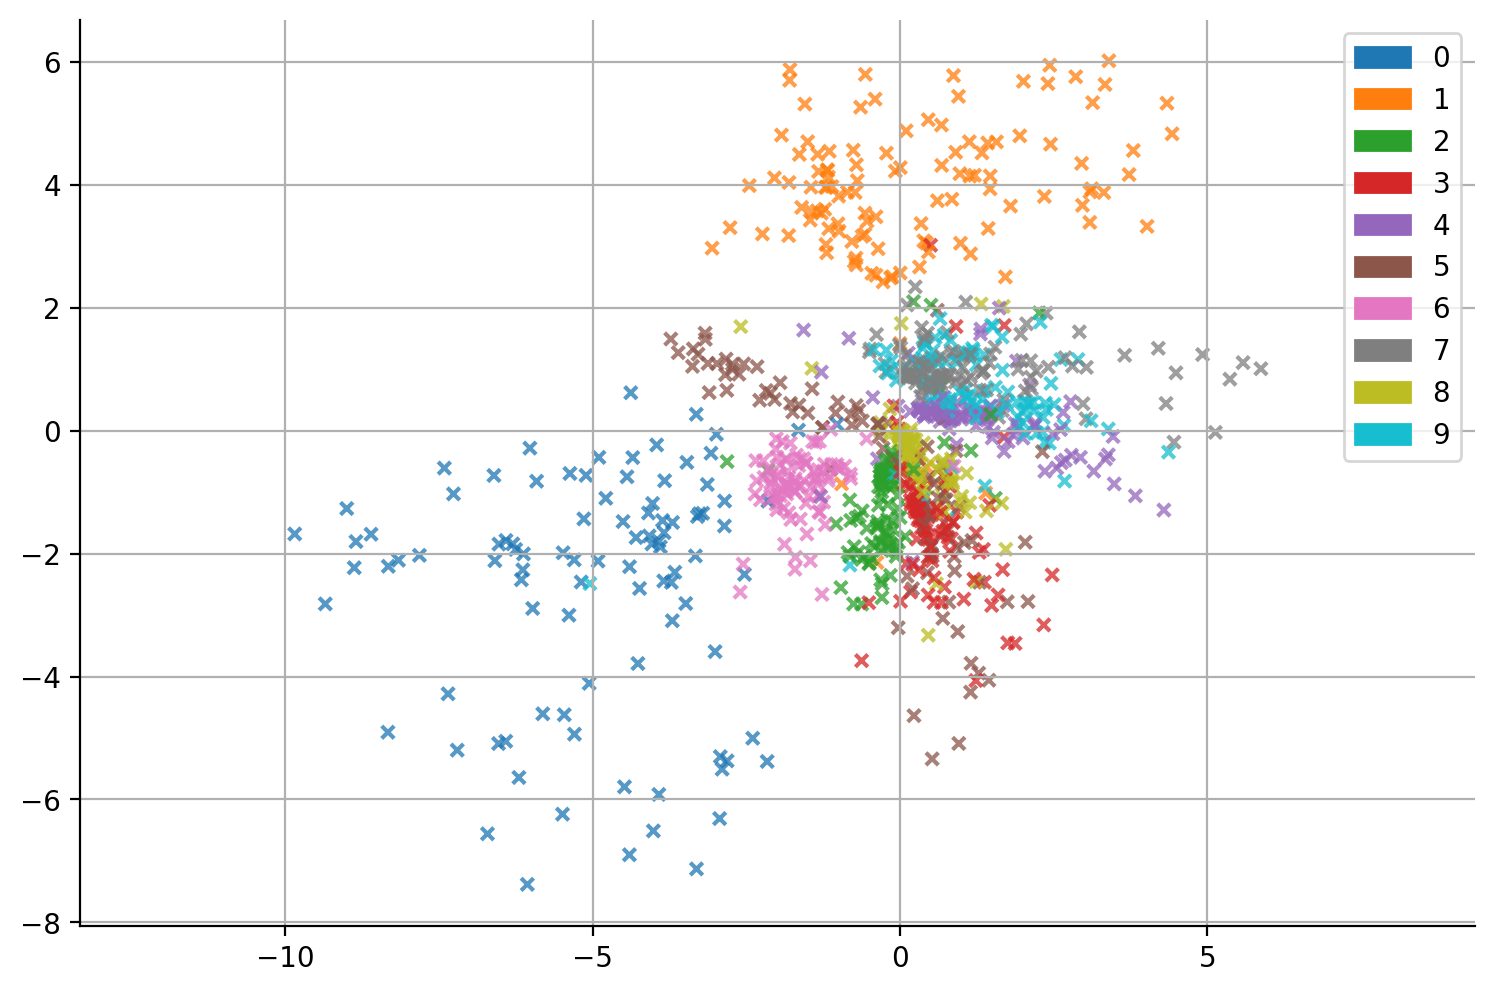

In [26]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_gmmvae(gmmvae_model, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
plt.show()

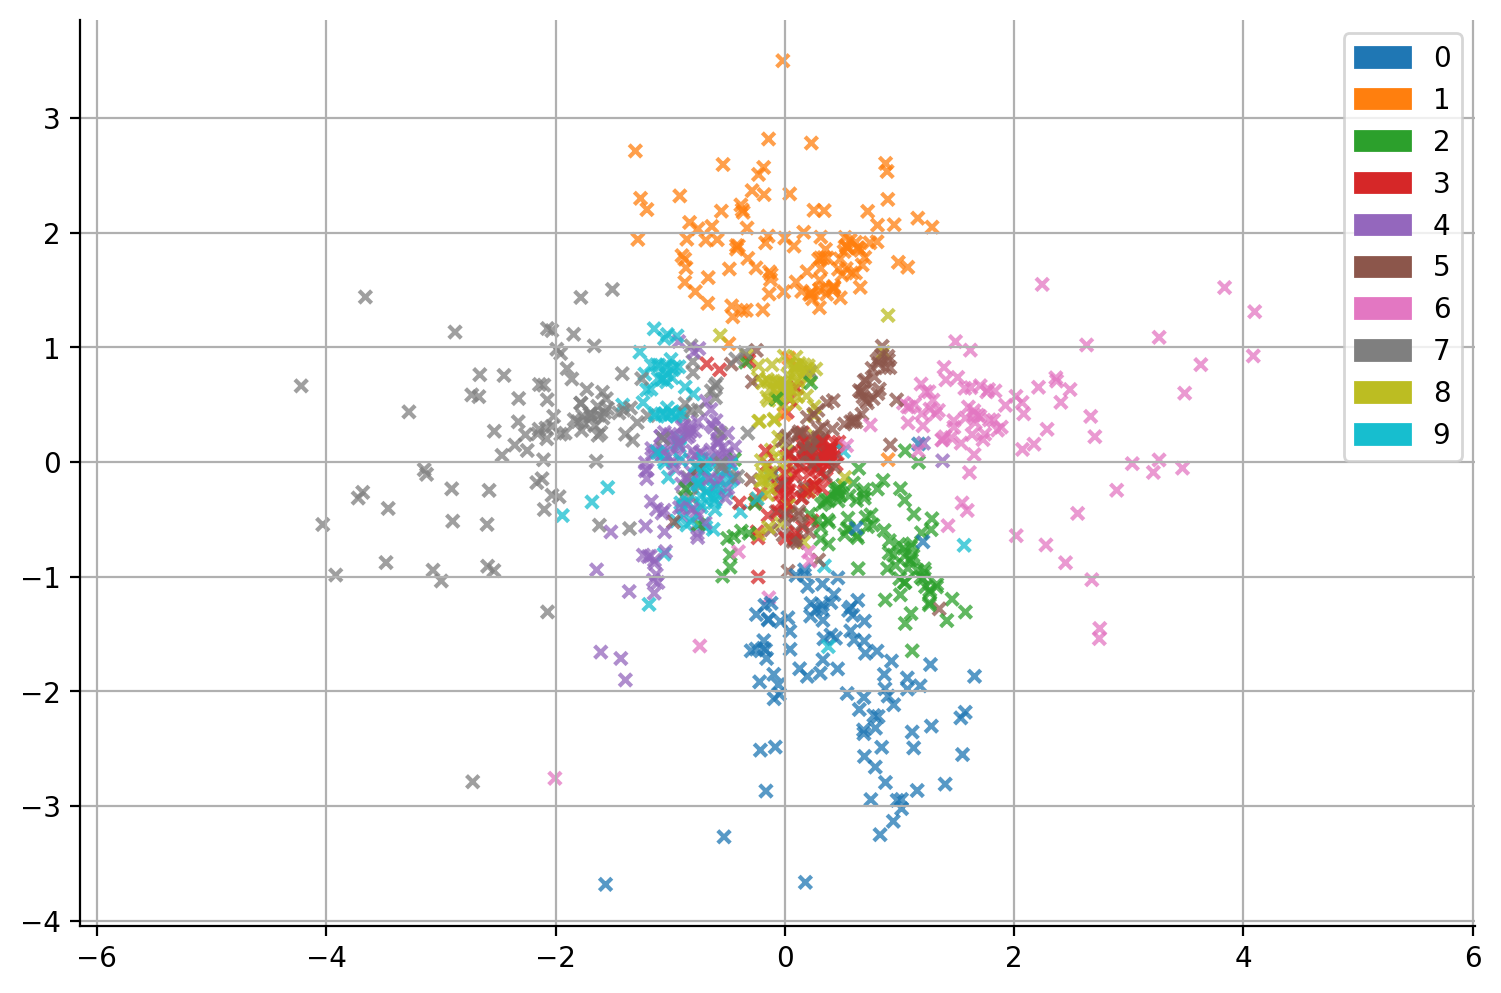

In [28]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_vae(vae, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
plt.show()

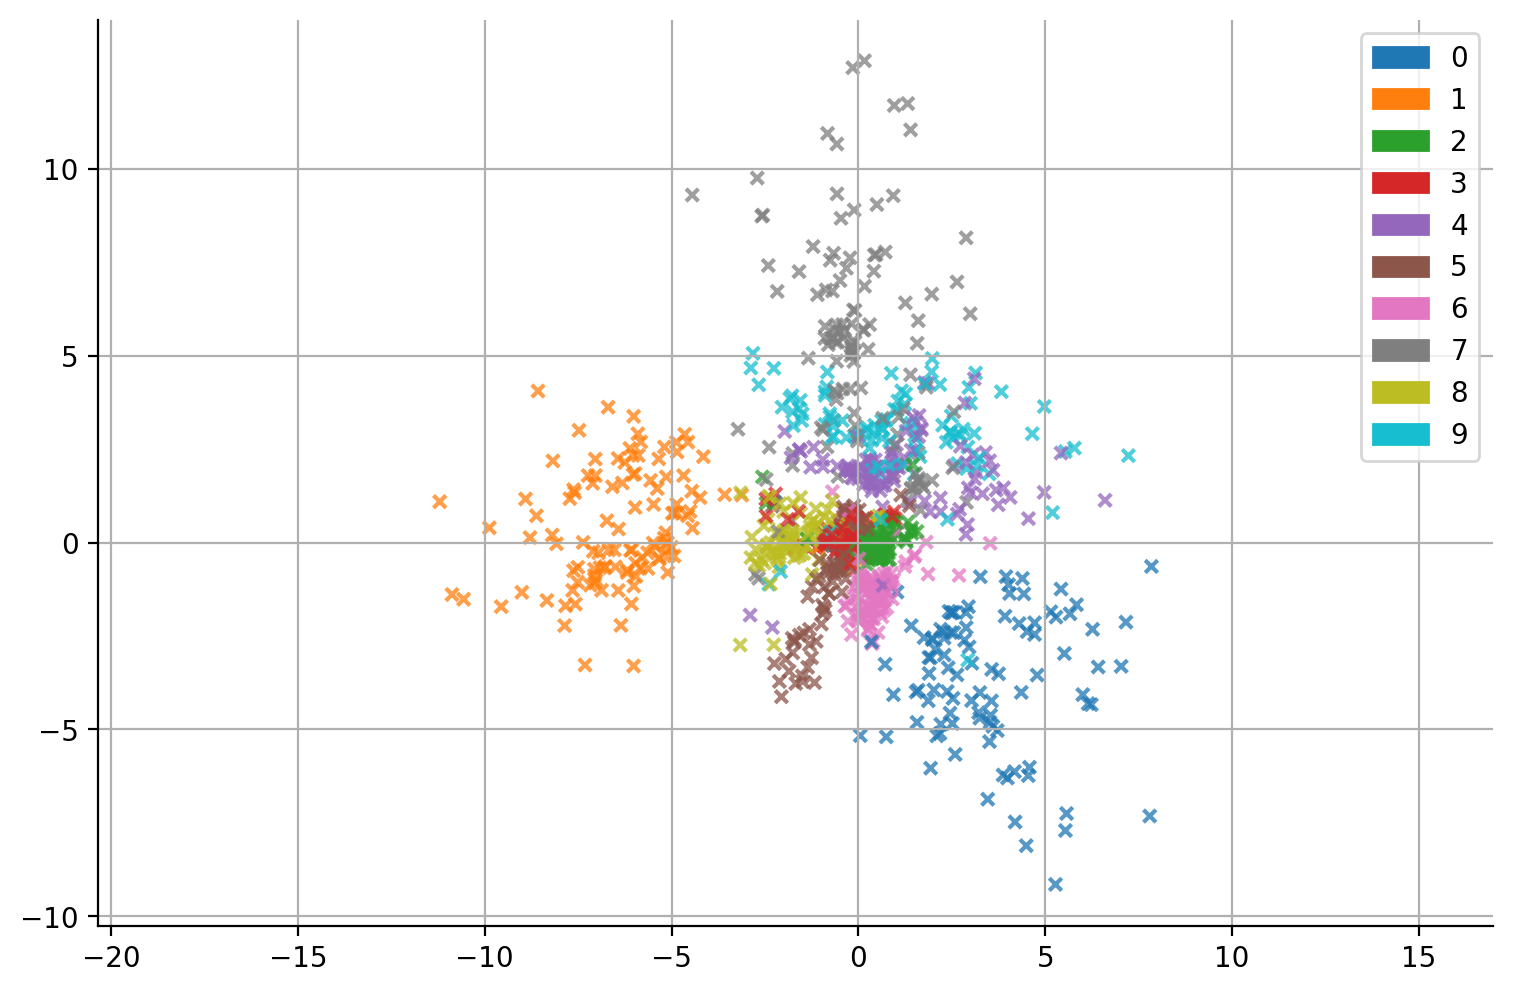

In [29]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_vae(weighted_vae, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
# plt.savefig('../figures/mnist/weighted_vae_latent_space.png', dpi=400, bbox_inches='tight')
plt.show()

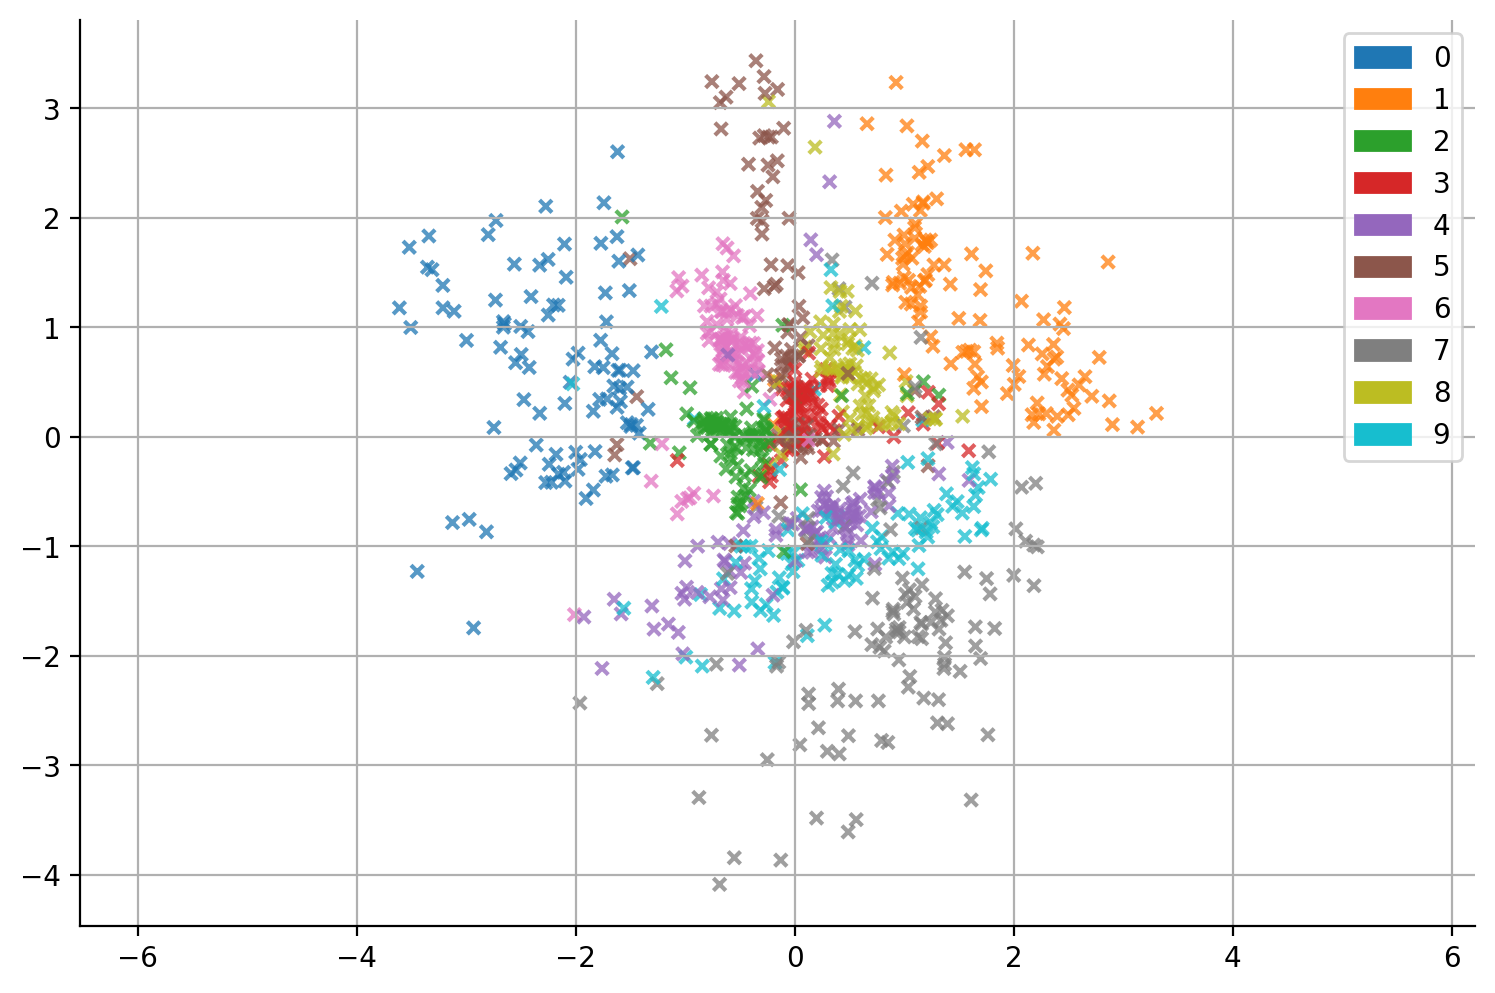

In [28]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_vae(vae, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
# plt.savefig('../figures/mnist/vae_latent_space.png', dpi=400, bbox_inches='tight')
plt.show()

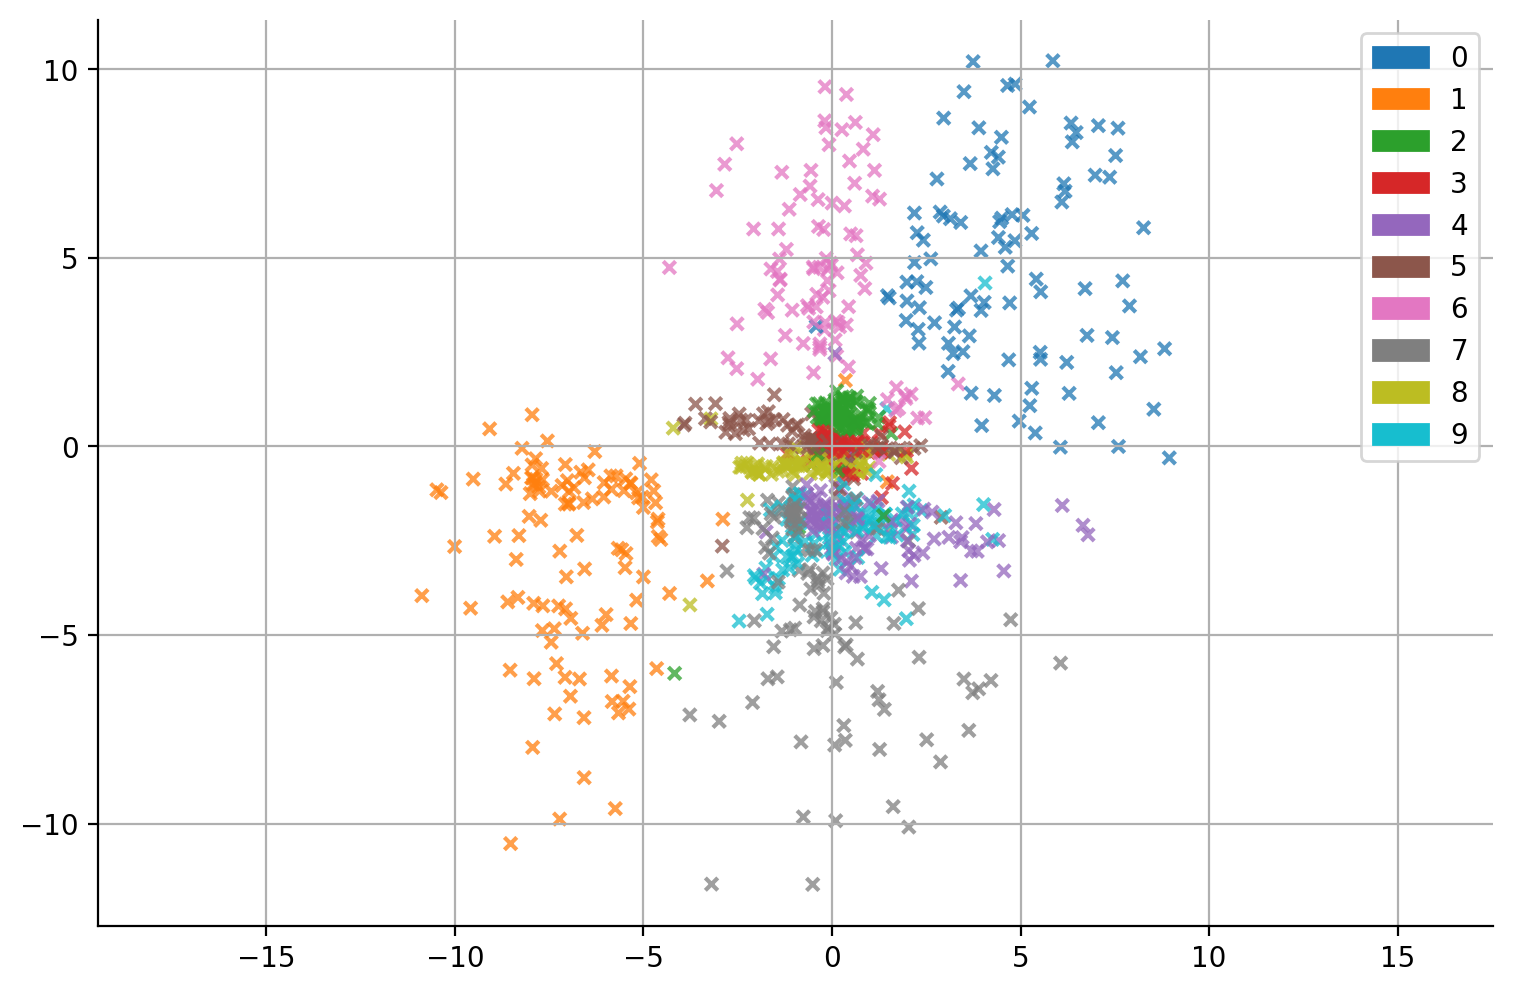

In [114]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_vae(hierarchical_vae, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
# plt.savefig('../figures/mnist/hierarchical_vae_latent_space.png', dpi=400, bbox_inches='tight')
plt.show()

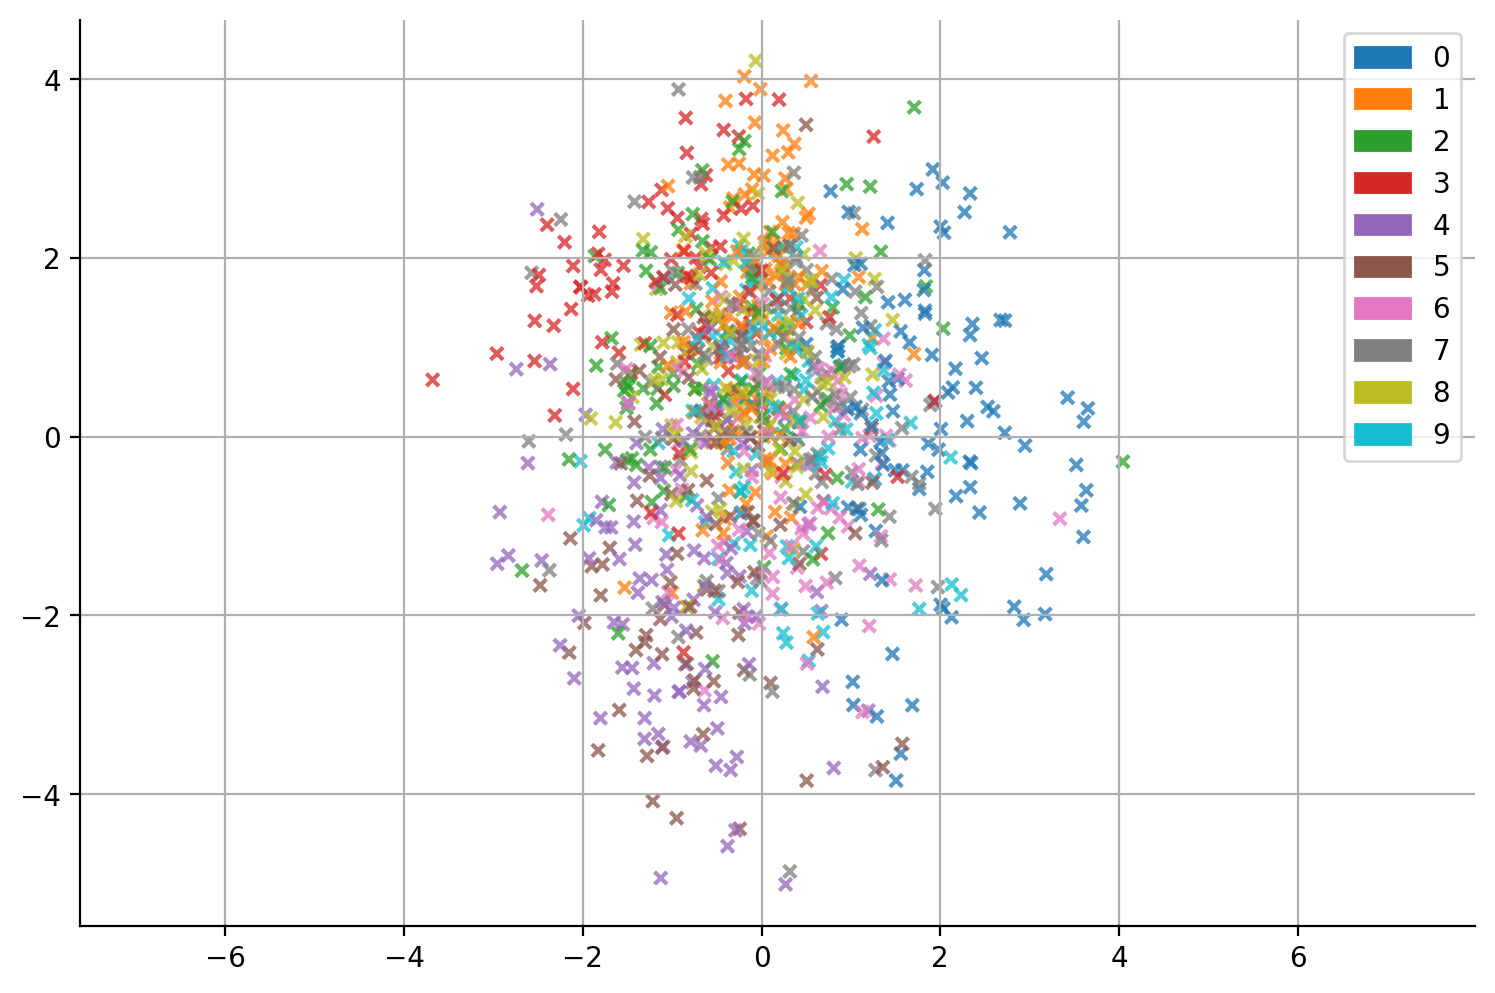

In [160]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_vae(bayes_trex, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
# plt.savefig('../figures/mnist/hierarchical_vae_latent_space.png', dpi=400, bbox_inches='tight')
plt.show()

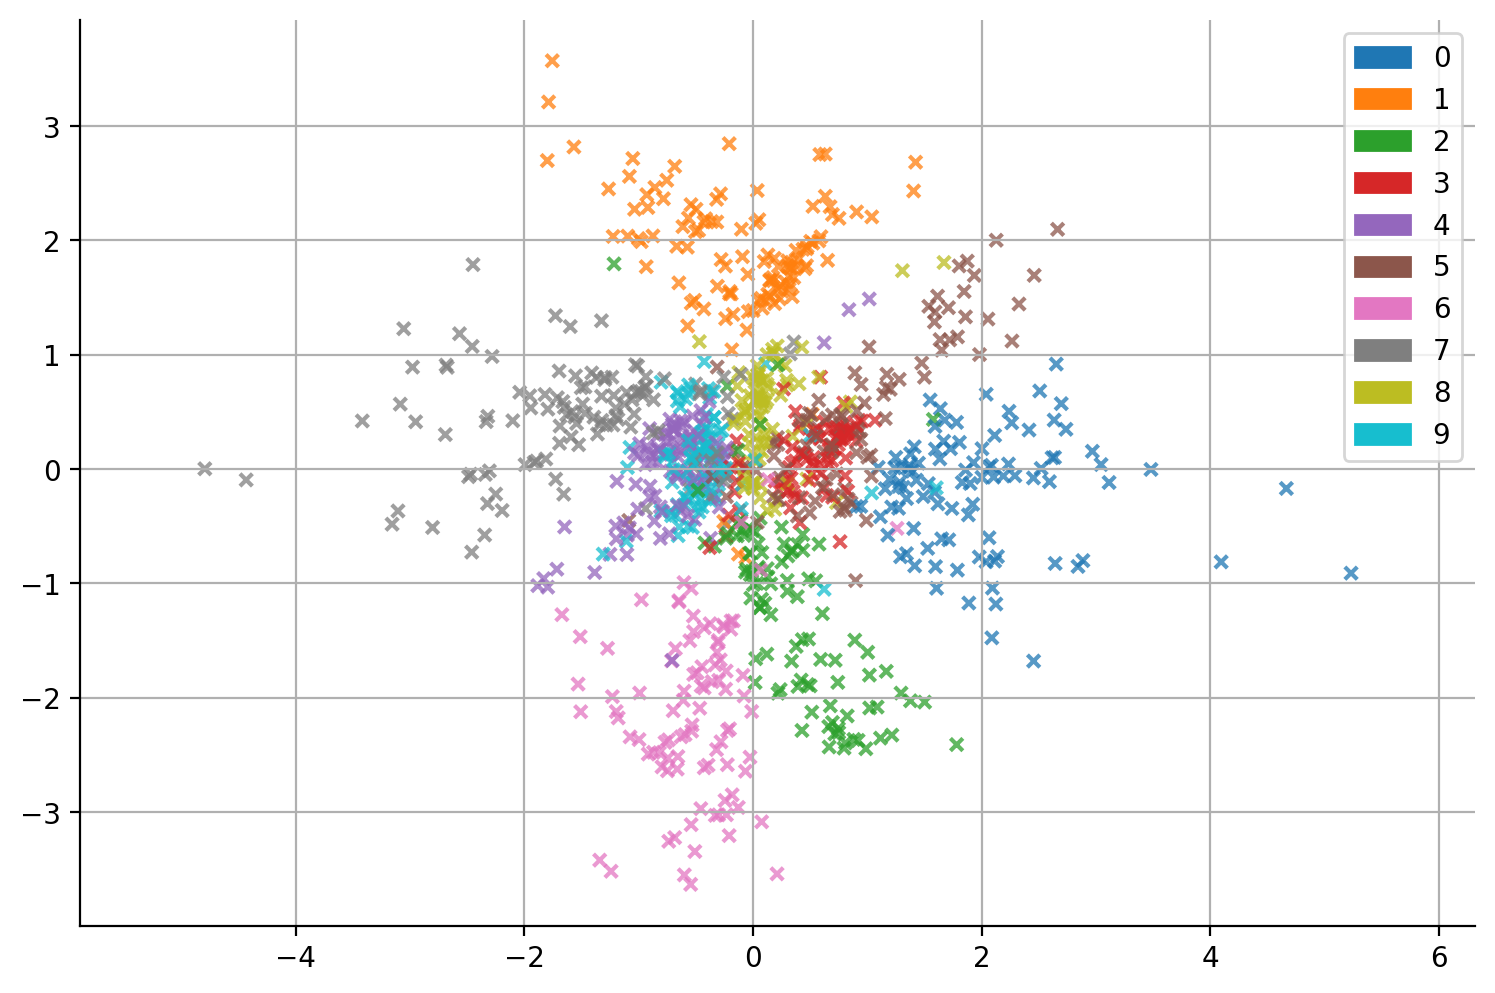

In [183]:
fig = plt.figure(figsize=(9, 6), dpi=200)

x = gmmvae_dataset.x[:1000].view(-1, 784).float() / 255
y = gmmvae_dataset.y[:1000]
pi = gmmvae_dataset.cls_output[:1000]
plot_clsvae(clsvae, x, y, pi)

# Hide the right and top spines.
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend.
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_patches = [Rectangle((0, 0), 1, 1, color=colours[i]) for i in range(10)]
ax.legend(custom_patches, [str(i) for i in range(10)])

plt.grid(0.25)
# plt.savefig('../figures/mnist/hierarchical_vae_latent_space.png', dpi=400, bbox_inches='tight')
plt.show()

## Inspect individual samples

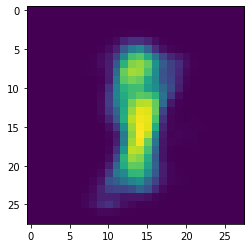

In [213]:
pi = torch.zeros(10)
pi[8] = 1

x_sample, y_sample = clsvae.sample(y=pi)
img = x_sample.detach().reshape(-1, 28, 28).numpy()

plt.imshow(np.transpose(img, (1,2,0)))

In [40]:
img.shape

(1, 784)

In [33]:
pi

tensor([0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])